In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#from lmfit import minimize, Parameters, Parameter, report_fit

In [12]:
#constant parameters
#se molecules
#rithmoi kai xronoi se lepta!
mi= 0.015
kd1=100*10**(-9) 
kd2=20*10**(-9)
kdlux=100*10**(-9)
k_min_one=10
k_min_two=1
k1=k_min_one/kd1
k2=k_min_two/kd2
d_mrnamng=0.039 
d_mng=0.01
d_mrnaluxr=0.347
d_mon=0.156
d_dim=0.017
d_luxr=0.002
d_AHL=0.01
D=10
Vecoli=10**(-9)
Vbead=10**(-3)
Vc=Vecoli/Vbead
Nmax=200
n=2
b_plux=0.1 #percentage of leakage
plux=0.79 #promoters
pcon=(58.5*10**(-3))*60
t=np.linspace(0, 1000)     




In [13]:
print(k1,k2,k_min_one,k_min_two)

99999999.99999999 50000000.0 10 1


In [14]:
def receivers_model(x,t): 
    N=x[0]
    AHL_ext=x[1]
    AHL=x[2]
    LuxR=x[3]
    Mon=x[4]
    Dim=x[5]
    mng=x[6]
    
    dNdt=mi*N*(1-(N/Nmax))
    dAHL_extdt=D*Nmax*(AHL-Vc*AHL_ext)-(d_AHL+mi)*AHL_ext
    dAHLdt=k_min_one*Mon-k1*AHL*LuxR -(d_AHL+mi)*AHL +D*(Vc*AHL_ext-AHL)
    dLuxRdt1= (kluxr*pcon*CN/(d_mrnaluxr+mi)) - (d_luxr+mi)*LuxR
    dLuxRdt2= (kluxr*plux*CN/(d_mrnaluxr+mi))*(b_plux+(1-b_plux)*((Dim**n)/(Dim**n+kdlux_eff**n))) - (d_luxr+mi)*LuxR
    dLuxRdt= dLuxRdt1+dLuxRdt2 +(d_luxr+mi)*LuxR + k_min_one*Mon - k1*LuxR*AHL
    dMondt= (k1*LuxR*AHL+2*k_min_two*Dim-k_min_one*Mon-2*k2*(Mon**2)-(d_mon+mi)*Mon)
    dDimdt= (k2*(Mon**2)-k_min_two*Dim-(d_dim+mi)*Dim)
    dmngdt = (kmng*plux*CN/(d_mrnamng+mi))*(b_plux+(1-b_plux)*(((Dim)**n)/((Dim)**n+(kdlux_eff)**n))) - (d_mng+mi)*mng
    
    return [dNdt,dAHL_extdt,dAHLdt,dLuxRdt,dMondt,dDimdt,dmngdt]
    

1.0000000000000002e-06 3.3480170915796033e-07 5.466523414307505e-06 4103.526782216625


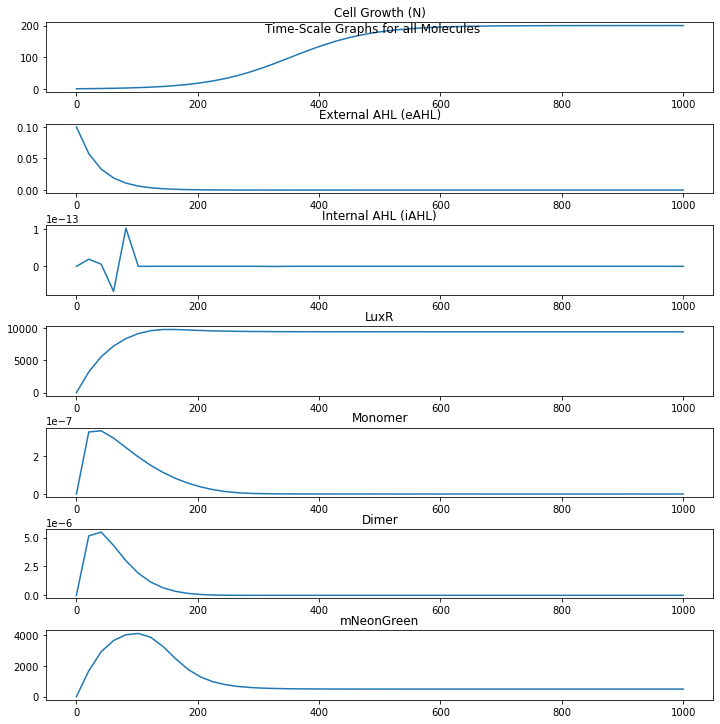

In [15]:
#time-scale
#kluxr_arr=[110*60*10**(-3),24.7*60*10**(-3),27*60*10**(-3)]

kmng=(14*10**(-3))*60
kluxr=(27*10**(-3))*60
CN=10
kdlux_eff=kdlux*CN
x0=[1,10**(-1),0,0,0,0,0] #N-AHL_ext-AHL-LuxR-Mon-Dim-mng
solution=odeint(receivers_model,x0,t)
fig,axs=plt.subplots(7,figsize=(10,10))
fig.tight_layout()
plt.suptitle('Time-Scale Graphs for all Molecules')
axs[0].plot(t,solution[:,0])
axs[0].set_title('Cell Growth (N)')
axs[1].plot(t,solution[:,1])
axs[1].set_title('External AHL (eAHL)')
axs[2].plot(t,solution[:,2])
axs[2].set_title('Internal AHL (iAHL)')
axs[3].plot(t,solution[:,3])
axs[3].set_title('LuxR')
axs[4].plot(t,solution[:,4])
axs[4].set_title('Monomer')
axs[5].plot(t,solution[:,5])
axs[5].set_title('Dimer')
axs[6].plot(t,solution[:,6])
axs[6].set_title('mNeonGreen')
print(kdlux_eff,max(solution[:,4]),max(solution[:,5]),max(solution[:,6]))

Text(0.5, 1.0, 'Transfer Function for CN=10, RBS_luxr=034, RBS_mng=034')

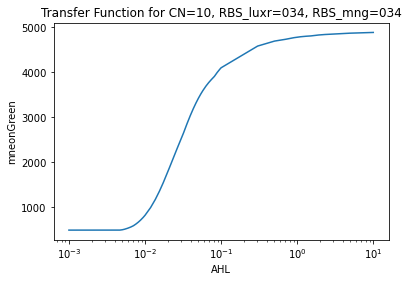

In [16]:
#one TF

#time-scale

kmng=14*10**(-3)*60
kluxr=110*10**(-3)*60
CN=10
kdlux_eff=kdlux*CN

mng_temp=[]
AHL_values_0=np.linspace(10**(-3),10**(-2))
AHL_values_1=np.linspace(10**(-2),10**(-1))
AHL_values_2=np.linspace(10**(-1),10**(1))
AHL_values=np.concatenate([AHL_values_0,AHL_values_1,AHL_values_2])
for i in range(150):
    x0=[1,AHL_values[i],0,0,0,0,0]
    solution=odeint(receivers_model,x0,t)
    mng_temp.append(max(solution[:,6]))
plt.semilogx(AHL_values,mng_temp)
plt.xlabel('AHL')
plt.ylabel('mneonGreen')
#plt.yscale('log')
plt.title('Transfer Function for CN=10, RBS_luxr=034, RBS_mng=034')

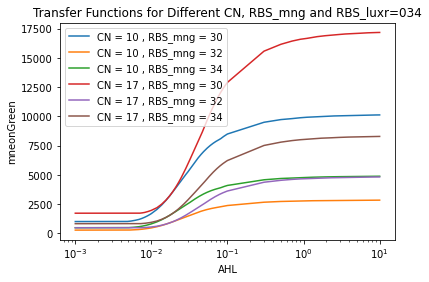

In [17]:
#parametric for rbs_mneon

#variable parameters (constructs)
kluxr=27*60*10**(-3)
kmng_arr= [29*60*10**(-3),8.15*60*10**(-3),14*60*10**(-3)]
CN_arr= [10,17]

AHL_values_0=np.linspace(10**(-3),10**(-2))
AHL_values_1=np.linspace(10**(-2),10**(-1))
AHL_values_2=np.linspace(10**(-1),10**(1))
AHL_values=np.concatenate([AHL_values_0,AHL_values_1,AHL_values_2])
mng_values=[]
RBS_arr=[30,32,34]
for k in range(2):
    for j in range(3):
        CN=CN_arr[k]
        kmng=kmng_arr[j]
        RBS=RBS_arr[j]
        mng_temp=[]
        kdlux_eff=kdlux*CN
        for i in range(150):
            x0=[1,AHL_values[i],0,0,0,0,0] #LuxR-Mon-Dim-mng
            solution=odeint(receivers_model,x0,t)
            mng_temp.append(max(solution[:,6]))
        plt.semilogx(AHL_values,mng_temp,label="CN = %1.f , RBS_mng = %2.f"%(CN,RBS))
        plt.xlabel('AHL')
        plt.ylabel('mneonGreen')
        #plt.yscale('log')
        plt.legend()
plt.title('Transfer Functions for Different CN, RBS_mng and RBS_luxr=034')
plt.show()

4871.730847903594
4023.644728448441
4203.67213708501
8282.114538904545
6979.305639909763
7255.6085829804615


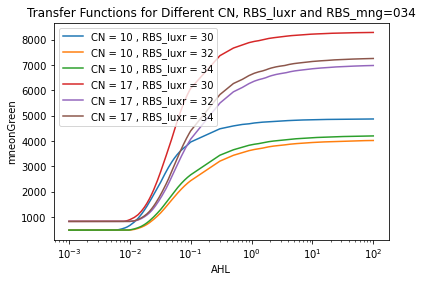

In [18]:
#parametric for rbs_luxr

#variable parameters (constructs)
kluxr_arr=[110*60*10**(-12),24*60*10**(-12),27*60*10**(-12)] #rbs for each gene #24.7
kmng=14*60*10**(-3)
CN_arr= [10,17]


AHL_values_0=np.linspace(10**(-3),10**(-2))
AHL_values_1=np.linspace(10**(-2),10**(-1))
AHL_values_2=np.linspace(10**(-1),10**(1))
AHL_values_3=np.linspace(10**(1),10**(2))
AHL_values=np.concatenate([AHL_values_0,AHL_values_1,AHL_values_2,AHL_values_3])
mng_values=[]
RBS_arr=[30,32,34]
for k in range(2):
    for j in range(3):
        CN=CN_arr[k]
        kluxr=kluxr_arr[j]
        RBS=RBS_arr[j]
        mng_temp=[]
        kdlux_eff=kdlux*CN
        for i in range(200):
            x0=[1,AHL_values[i],0,0,0,0,0] #LuxR-Mon-Dim-mng
            solution=odeint(receivers_model,x0,t)
            mng_temp.append(max(solution[:,6]))
        print(max(solution[:,6]))
        plt.semilogx(AHL_values,mng_temp,label="CN = %1.f , RBS_luxr = %2.f"%(CN,RBS))
        plt.xlabel('AHL')
        plt.ylabel('mneonGreen')
        plt.legend()
plt.title('Transfer Functions for Different CN, RBS_luxr and RBS_mng=034')
plt.show()